In [5]:
%matplotlib inline

import numpy as np
from datetime import datetime, timedelta
from pandas.io.data import DataReader
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt

PAST_DAYS = 365
t1 = datetime.now()
# one year later
t2 = t1 - timedelta(days=PAST_DAYS)

In [6]:
BITCON_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/COINBASEUSD.csv'

In [3]:
bcdf = read_csv(BITCON_URL)[::-1]
print len(bcdf)
bcdf = bcdf[bcdf['Date']> t2.strftime("%Y-%m-%d")]

755


In [7]:
bcdf.head()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
240,2016-10-05,610.33,614.24,609.22,613.16,4454.403695,2.726213e+06,612.026520
239,2016-10-06,613.16,613.39,610.30,611.88,3920.075316,2.401040e+06,612.498435
238,2016-10-07,611.78,618.70,609.89,617.98,5119.988900,3.149936e+06,615.223190
237,2016-10-08,618.11,620.00,617.55,619.50,2793.955354,1.729010e+06,618.839671
236,2016-10-09,619.46,619.59,617.00,617.42,2329.862077,1.440506e+06,618.279531


In [8]:
bcdf.tail()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
4,2017-09-29,4189.42,4212.99,4015.17,4156.99,10033.657866,4.147286e+07,4133.373957
3,2017-09-30,4156.99,4356.28,4143.52,4339.00,6138.371044,2.625789e+07,4277.663731
2,2017-10-01,4339.01,4396.99,4256.92,4394.81,5282.937190,2.282130e+07,4319.813188
1,2017-10-02,4394.81,4470.00,4354.99,4392.71,8356.639468,3.679041e+07,4402.536107
0,2017-10-03,4392.71,4419.95,4242.42,4295.00,9585.625515,4.134676e+07,4313.412460


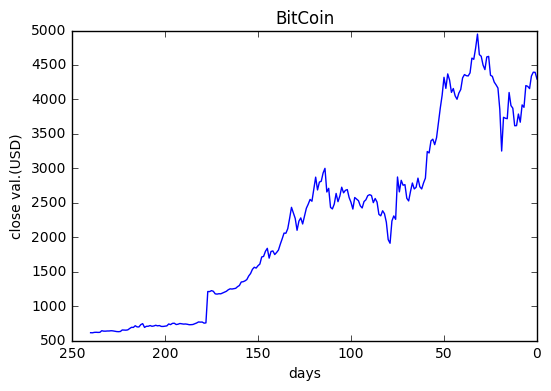

In [11]:
plt.title("BitCoin")
plt.xlabel('days')
plt.ylabel('close val.(USD)')

plt.gca().invert_xaxis()
plt.plot(bcdf['Close'])

## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [171]:
bcdf['simple_return'] = (bcdf['Close'] / bcdf['Close'].shift(1)) - 1
print bcdf['simple_return']

240         NaN
239   -0.002088
238    0.009969
237    0.002460
236   -0.003358
235    0.002106
234    0.037820
233   -0.009858
232   -0.000204
231    0.003728
230    0.000204
229    0.005892
228   -0.003676
227   -0.006958
226   -0.008377
225   -0.002763
224    0.004426
223    0.034748
222   -0.002620
221   -0.001628
220    0.006646
219    0.030109
218    0.025534
217   -0.001823
216    0.035263
215   -0.023618
214   -0.000731
213    0.048501
212    0.019023
211   -0.073328
         ...   
29    -0.027626
28    -0.014615
27     0.041437
26     0.001733
25    -0.059293
24    -0.003595
23    -0.019149
22    -0.009559
21    -0.010972
20    -0.074246
19    -0.156905
18     0.150634
17    -0.003612
16    -0.001755
15     0.102159
14    -0.046315
13    -0.009731
12    -0.065751
11     0.000426
10     0.046510
9     -0.031241
8      0.068348
7     -0.008850
6      0.081056
5     -0.002519
4     -0.007741
3      0.043784
2      0.012862
1     -0.000478
0     -0.022244
Name: simple_return, dty

In [172]:
print bcdf['simple_return']

240         NaN
239   -0.002088
238    0.009969
237    0.002460
236   -0.003358
235    0.002106
234    0.037820
233   -0.009858
232   -0.000204
231    0.003728
230    0.000204
229    0.005892
228   -0.003676
227   -0.006958
226   -0.008377
225   -0.002763
224    0.004426
223    0.034748
222   -0.002620
221   -0.001628
220    0.006646
219    0.030109
218    0.025534
217   -0.001823
216    0.035263
215   -0.023618
214   -0.000731
213    0.048501
212    0.019023
211   -0.073328
         ...   
29    -0.027626
28    -0.014615
27     0.041437
26     0.001733
25    -0.059293
24    -0.003595
23    -0.019149
22    -0.009559
21    -0.010972
20    -0.074246
19    -0.156905
18     0.150634
17    -0.003612
16    -0.001755
15     0.102159
14    -0.046315
13    -0.009731
12    -0.065751
11     0.000426
10     0.046510
9     -0.031241
8      0.068348
7     -0.008850
6      0.081056
5     -0.002519
4     -0.007741
3      0.043784
2      0.012862
1     -0.000478
0     -0.022244
Name: simple_return, dty

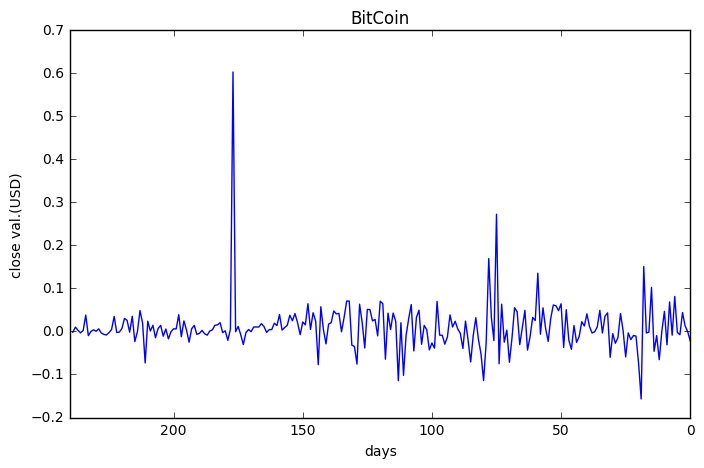

In [173]:
bcdf['simple_return'].plot(figsize=(8, 5))
plt.show()

In [179]:
avg_returns_d = bcdf['simple_return'].mean()
avg_returns_d

0.009578778913252399

In [177]:
avg_returns_a = bcdf['simple_return'].mean() * 365
avg_returns_a

3.4962543033371256

In [178]:
print str(round(avg_returns_a, 5) * 100) + ' %'

349.625 %
